In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from prettytable import PrettyTable

## Data Gathering

In [2]:
data = pd.read_csv("ODI_data.csv")

In [3]:
data.head(10)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RL Chase,18,18,34,1.0,0.0,23,0,0,78.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SS Cottrell,17,17,23,1.0,0.0,18,2,1,94.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,JO Holder,13*,13,38,1.0,1.0,19,0,0,68.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CH Gayle,11,11,49,1.0,0.0,24,1,0,45.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SD Hope,5,5,14,1.0,0.0,10,0,0,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CR Brathwaite,0,0,5,1.0,0.0,3,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KAJ Roach,0,0,5,1.0,0.0,3,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Innings Player', 'Innings Runs Scored', 'Innings Runs Scored Num',
       'Innings Minutes Batted', 'Innings Batted Flag', 'Innings Not Out Flag',
       'Innings Balls Faced', 'Innings Boundary Fours',
       'Innings Boundary Sixes', 'Innings Batting Strike Rate',
       'Innings Number', 'Opposition', 'Ground', 'Innings Date', 'Country',
       '50's', '100's', 'Innings Runs Scored Buckets', 'Innings Overs Bowled',
       'Innings Bowled Flag', 'Innings Maidens Bowled',
       'Innings Runs Conceded', 'Innings Wickets Taken', '4 Wickets',
       '5 Wickets', '10 Wickets', 'Innings Wickets Taken Buckets',
       'Innings Economy Rate'],
      dtype='object')

In [5]:
data.shape

(171968, 28)

In [6]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Data Cleaning

In [7]:
data['Innings Runs Scored Buckets'].unique()

array(['50-99', '0-49', '100-149', '-', nan, '150-199', '200+'],
      dtype=object)

In [8]:
data['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [9]:
data = data[data['Innings Runs Scored Num'] != "-"]

In [10]:
data = data.dropna(subset = ['Innings Runs Scored Num'])

In [11]:
data.shape

(67595, 28)

In [12]:
data['Innings Runs Scored Num'] = data['Innings Runs Scored Num'].astype('int')

In [13]:
data['Innings Balls Faced'] = data['Innings Balls Faced'].astype('int')

## Data Preprocessing

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67595 entries, 0 to 171941
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Innings Player                 67595 non-null  object 
 1   Innings Runs Scored            67595 non-null  object 
 2   Innings Runs Scored Num        67595 non-null  int32  
 3   Innings Minutes Batted         67595 non-null  object 
 4   Innings Batted Flag            67595 non-null  float64
 5   Innings Not Out Flag           67595 non-null  float64
 6   Innings Balls Faced            67595 non-null  int32  
 7   Innings Boundary Fours         67595 non-null  object 
 8   Innings Boundary Sixes         67595 non-null  object 
 9   Innings Batting Strike Rate    67595 non-null  object 
 10  Innings Number                 67595 non-null  object 
 11  Opposition                     67595 non-null  object 
 12  Ground                         67595 non-null

In [15]:
data['year'] = pd.to_datetime(data['Innings Date']).dt.year

C:\Users\user\AppData\Local\Temp\ipykernel_21204\2816701943.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['year'] = pd.to_datetime(data['Innings Date']).dt.year


In [16]:
sachin_data = data[(data['year'] >=1994) & (data['year']<= 2004)]

In [17]:
virat_data = data[(data['year'] >=2009) & (data['year']<= 2019)]

In [18]:
sachin_data.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77610,V Sehwag,70,70,85,1.0,0.0,52,9,2,134.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0.0,32,8,3,215.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77612,R Dravid,60,60,87,1.0,0.0,68,5,0,88.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77613,SC Ganguly,55,55,98,1.0,0.0,80,2,2,68.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77614,SR Tendulkar,47,47,60,1.0,0.0,42,9,0,111.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [19]:
virat_data.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,SO Hetmyer,18,18,31,1.0,0.0,20,2,0,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,RL Chase,18,18,34,1.0,0.0,23,0,0,78.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,SS Cottrell,17,17,23,1.0,0.0,18,2,1,94.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


# Parameters to check which one is a better player
### - Runs per Innings 
        total runs scored by a player/ total innings he has played
### - Strike Rate
        (total runs scored by a player/total balls he has faced) x 100
### - Number of 100's
        total number of centuries
### - Number of 50's
        total numbber of fifties
### - Team Contribution
        (total runs scored by a player/ total runs scored by a team) X 100

In [20]:
sachin = sachin_data[sachin_data['Innings Player'] == 'SR Tendulkar']

In [21]:
sachin.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77614,SR Tendulkar,47,47,60,1.0,0.0,42,9,0,111.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77747,SR Tendulkar,19,19,46,1.0,0.0,32,3,0,59.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
78054,SR Tendulkar,16,16,30,1.0,0.0,17,2,0,94.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79590,SR Tendulkar,74,74,170,1.0,0.0,100,7,1,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79681,SR Tendulkar,18,18,30,1.0,0.0,21,3,0,85.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [22]:
#total runs scored by Sachin

sum(sachin['Innings Runs Scored Num'])

11818

In [23]:
#Runs per Innings

RPI_Sachin = sum(sachin['Innings Runs Scored Num'])/len(sachin)
print(RPI_Sachin)

43.608856088560884


In [24]:
#Strike Rate

Strike_rate_Sachin = sum(sachin['Innings Runs Scored Num'])/sum(sachin['Innings Balls Faced'])*100
print(Strike_rate_Sachin)

88.21377920429947


In [25]:
#No. of 100s

Hundred_sachin = sum(sachin['100\'s'])
print(Hundred_sachin)

37.0


In [26]:
#No of 50s

fifty_sachin = sum(sachin['50\'s'])
print(fifty_sachin)

57.0


In [27]:
#Team Contribution

TC_Sachin = sum(sachin['Innings Runs Scored Num'])/sum(sachin_data[sachin_data['Country']=='India']['Innings Runs Scored Num']) * 100
print("{}%".format(TC_Sachin))

16.951875493078962%


In [28]:
virat = virat_data[virat_data['Innings Player']=='V Kohli']

In [29]:
virat.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,...,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
11,V Kohli,120,120,179,1.0,0.0,125,14,1,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
327,V Kohli,1,1,8,1.0,0.0,6,0,0,16.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
420,V Kohli,34*,34,61,1.0,1.0,41,3,0,82.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
664,V Kohli,26,26,45,1.0,0.0,27,3,0,96.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
804,V Kohli,66,66,103,1.0,0.0,76,7,0,86.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [30]:
#total runs scored by Virat

sum(virat['Innings Runs Scored Num'])

11247

In [31]:
#Runs per Innings

RPI_Virat = sum(virat['Innings Runs Scored Num'])/len(virat['Innings Runs Scored Num'])
print(RPI_Virat)

50.20982142857143


In [32]:
#Strike Rate

Strike_rate_Virat = sum(virat['Innings Runs Scored Num'])/sum(virat['Innings Balls Faced']) * 100
Strike_rate_Virat

93.56126778138258

In [33]:
#No. of 100s

Hundred_virat = sum(virat['100\'s'])
print(Hundred_virat)

42.0


In [34]:
#No of 50s

fifty_virat = sum(virat['50\'s'])
print(fifty_virat)

53.0


In [35]:
#Team Contribution

TC_Virat = sum(virat['Innings Runs Scored Num'])/sum(virat_data[virat_data['Country']=='India']['Innings Runs Scored Num']) * 100
print("{}%".format(TC_Virat))

17.610033350556627%


# Data Visualization

In [36]:
# During 1994-2004 the batsman with most runs 

sachin_data.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10)

Innings Player
SR Tendulkar      11818
SC Ganguly         9911
ST Jayasuriya      9297
Inzamam-ul-Haq     8561
R Dravid           7751
RT Ponting         7422
Saeed Anwar        7320
JH Kallis          7267
MS Atapattu        7253
MG Bevan           6912
Name: Innings Runs Scored Num, dtype: int32

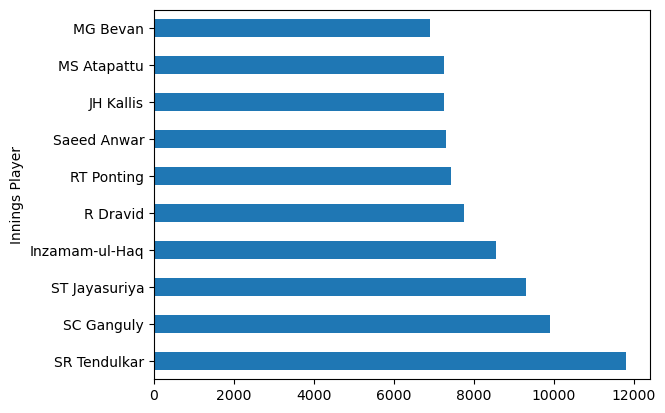

In [37]:
sachin_data.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

In [38]:
#During 2009-2019 the batsman with most runs 

virat_data.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10)

Innings Player
V Kohli           11247
RG Sharma          8083
HM Amla            7745
TM Dilshan         7296
KC Sangakkara      7275
AB de Villiers     7247
LRPL Taylor        7059
MS Dhoni           6838
EJG Morgan         6748
MJ Guptill         6626
Name: Innings Runs Scored Num, dtype: int32

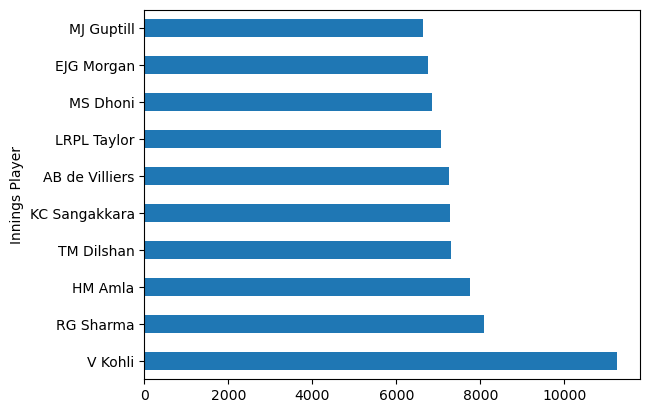

In [39]:
virat_data.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

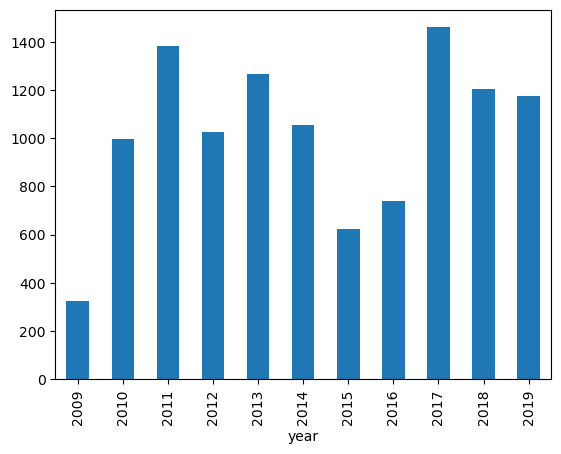

In [40]:
# Year wise Kohli's performance analysis

virat.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = 'bar')
plt.show()

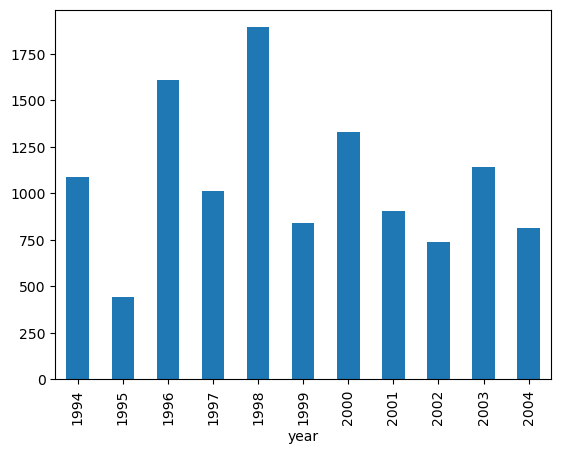

In [41]:
# Year wise Sachin's performance analysis

sachin.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = 'bar')
plt.show()

# Data Normalization

In [42]:
non_virat_data = virat_data[virat_data['Innings Player'] != 'V Kohli']

In [43]:
sum(non_virat_data['Innings Runs Scored Num'])/len(non_virat_data)

24.737756786500366

In [44]:
RPI_Virat

50.20982142857143

In [45]:
#Comparison of RPI of other players with Virat Kolhi on that time period 

com_RPI_virat = RPI_Virat/(sum(non_virat_data['Innings Runs Scored Num'])/len(non_virat_data))
print(com_RPI_virat)

2.029683688052565


In [46]:
non_sachin_data = sachin_data[sachin_data['Innings Player'] != 'SR Tendulkar']

In [47]:
sum(non_sachin_data['Innings Runs Scored Num'])/len(non_sachin_data)

22.43512946754194

In [48]:
#Comparison of RPI of other players with Sachin Tendulkar on that time period

com_RPI_sachin = RPI_Sachin/(sum(non_sachin_data['Innings Runs Scored Num'])/len(non_sachin_data))
print(com_RPI_sachin)

1.9437755485945407


In [49]:
sum(non_virat_data['Innings Runs Scored Num'])/sum(non_virat_data['Innings Balls Faced']) * 100

83.42743413330611

In [50]:
Strike_rate_Virat

93.56126778138258

In [51]:
#Comparison of Strike Rate of other players with Virat Kolhi on that time period 

com_SR_virat = Strike_rate_Virat/(sum(non_virat_data['Innings Runs Scored Num'])/sum(non_virat_data['Innings Balls Faced']) * 100)
print(com_SR_virat)

1.1214688399967323


In [52]:
sum(non_sachin_data['Innings Runs Scored Num'])/sum(non_sachin_data['Innings Balls Faced']) * 100

72.33808936558636

In [53]:
Strike_rate_Sachin

88.21377920429947

In [54]:
#Comparison of Strike Rate of other players with Sachin Tendulkar on that time period

com_SR_sachin = Strike_rate_Sachin/(sum(non_sachin_data['Innings Runs Scored Num'])/sum(non_sachin_data['Innings Balls Faced']) * 100)
print(com_SR_sachin)

1.2194651528391862


In [55]:
Hundred_virat

42.0

In [56]:
#Number of matches to get a hundred for Virat

len(virat['Innings Runs Scored Num'])/Hundred_virat

5.333333333333333

In [57]:
#Hundreds per match

com_100_virat= Hundred_virat/len(virat['Innings Runs Scored Num'])
print(com_100_virat)

0.1875


In [58]:
Hundred_sachin

37.0

In [59]:
#Number of matches to get hundred for Sachin

len(sachin['Innings Runs Scored Num'])/Hundred_sachin

7.324324324324325

In [60]:
#Hundreds per match

com_100_sachin = Hundred_sachin/len(sachin['Innings Runs Scored Num'])
print(com_100_sachin)

0.13653136531365315


In [61]:
fifty_sachin

57.0

In [62]:
#Number of matches to get fifty for Sachin

len(sachin['Innings Runs Scored Num'])/fifty_sachin

4.754385964912281

In [63]:
#fifties per match

com_50_sachin = fifty_sachin/len(sachin['Innings Runs Scored Num'])
print(com_50_sachin)

0.21033210332103322


In [64]:
fifty_virat

53.0

In [65]:
#Number of matches to get fifty for Virat

len(virat['Innings Runs Scored Num'])/fifty_virat

4.226415094339623

In [66]:
#fifties per match

com_50_virat = fifty_virat/len(virat['Innings Runs Scored Num'])
print(com_50_virat)

0.23660714285714285


In [67]:
sum(non_virat_data[non_virat_data['Country'] == 'India']['Innings Runs Scored Num'])/sum(virat_data[virat_data['Country']=='India']['Innings Runs Scored Num']) * 100

82.38996664944337

In [68]:
TC_Virat

17.610033350556627

In [69]:
TC_Virat/(sum(non_virat_data[non_virat_data['Country'] == 'India']['Innings Runs Scored Num'])/sum(virat_data[virat_data['Country']=='India']['Innings Runs Scored Num']) * 100)

0.21374002280501714

In [70]:
sum(non_sachin_data[non_sachin_data['Country'] == 'India']['Innings Runs Scored Num'])/sum(sachin_data[sachin_data['Country']=='India']['Innings Runs Scored Num']) * 100

83.04812450692104

In [71]:
TC_Sachin

16.951875493078962

In [72]:
TC_Sachin/(sum(non_sachin_data[non_sachin_data['Country'] == 'India']['Innings Runs Scored Num'])/sum(sachin_data[sachin_data['Country']=='India']['Innings Runs Scored Num']) * 100)

0.20412111162927263

# Best Batsman according to our model

In [73]:
myTable = PrettyTable(["Parameters", "Virat", "Sachin", "Winner"])

In [74]:
myTable.add_row(["Runs Per Innings", com_RPI_virat, com_RPI_sachin, "Virat"])
myTable.add_row(["Strike Rate", com_SR_virat, com_SR_sachin, "Sachin"])
myTable.add_row(["100's per match", com_100_virat, com_100_sachin, "Virat"])
myTable.add_row(["50's per match", com_50_virat, com_50_sachin, "Virat"])
myTable.add_row(["Team Contribution", TC_Virat, TC_Sachin, "Virat"])

print(myTable)

+-------------------+---------------------+---------------------+--------+
|     Parameters    |        Virat        |        Sachin       | Winner |
+-------------------+---------------------+---------------------+--------+
|  Runs Per Innings |  2.029683688052565  |  1.9437755485945407 | Virat  |
|    Strike Rate    |  1.1214688399967323 |  1.2194651528391862 | Sachin |
|  100's per match  |        0.1875       | 0.13653136531365315 | Virat  |
|   50's per match  | 0.23660714285714285 | 0.21033210332103322 | Virat  |
| Team Contribution |  17.610033350556627 |  16.951875493078962 | Virat  |
+-------------------+---------------------+---------------------+--------+
